# Image feature detection -- MNIST

Logistic Regression to predict digit labels based on images. The image above shows a bunch of training digits (observations) from the MNIST dataset whose category membership is known (labels 0–9). After training a model with logistic regression, it can be used to predict an image label (labels 0–9) given an image.
For full description refer to link below.

Like in any non trivial business cases the final proposed approach may required some investigations. In many cases selected solution wll need to be tested.

Use Case: In many situations extrat features from images are important business process to support automation and detection of related inferences, such: anomalies detectation, risk accessement,  and labeling images based on fix set of categories(Male/female, boot/shoes, car/truck/van, 1/2/3/, etcs)

A propose FP will to research the possible ways to train and optimize a range of models on the MNIST dataset. The Dataset was pre-processed and it is widely use as example ingestion data for many ML pipelines.

Before start your final project, please review this article in detail, where you will have a simple to run image classifier.  The questions below will be all related to related learnig objectives.
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Data ingestion

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

Few topics to explore and suggest possible enhancements.
Ingestion and data preparation: What are possible enhancements to the data collection? Use the colors, larger images?, please explore how you could propose the creation of such data set?

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


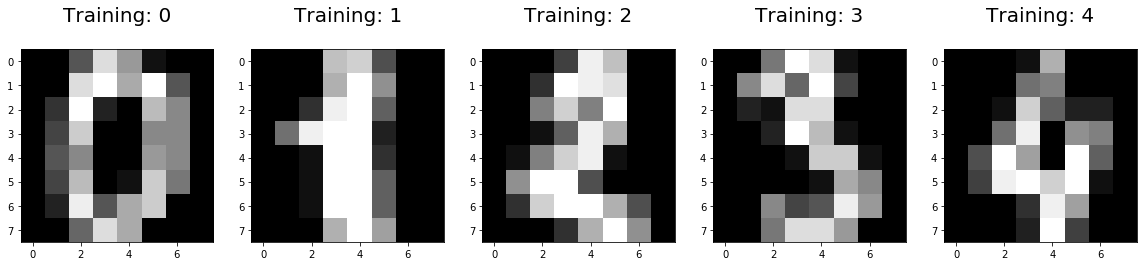

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

# Fitting a ML algorithm 

In [6]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/Users/janakisajja/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [8]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [9]:
#Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

# ML Validation

In [10]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [12]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


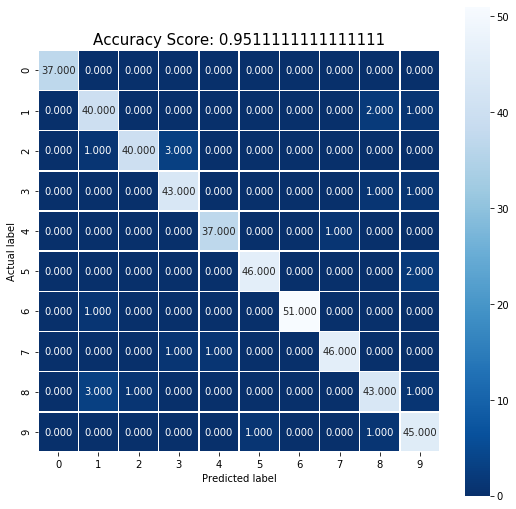

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


# Final Project Questions

1- What are the list of possible ML algortims from the URLS provided, explore the pros and contras of 2 of them

2- What are the digits causing distinctively miss-classification? how to detect it? Possible suggestions? 

3- Find an article not listed using other distictive ML aproach and write a short summary about it. ( 300-500 words)

4- Check this article - quite insightfull -- about hyperparameters.
describe what are the data set features, how many? (y / X)?
https://towardsdatascience.com/from-zero-to-hero-in-xgboost-tuning-e48b59bfaf58

5- Please summarise on a short sentence your interpretation of the best confusion matrix of this article. ( < 100 words)
https://www.kaggle.com/antonk/mnist-trying-and-tuning-different-models#Model-1:-SVM

6- Please change the code in line 8 to print 6 training samples and display numbers 0-5


# 6- Please change the code in line 8 to print 6 training samples and display numbers 0-5

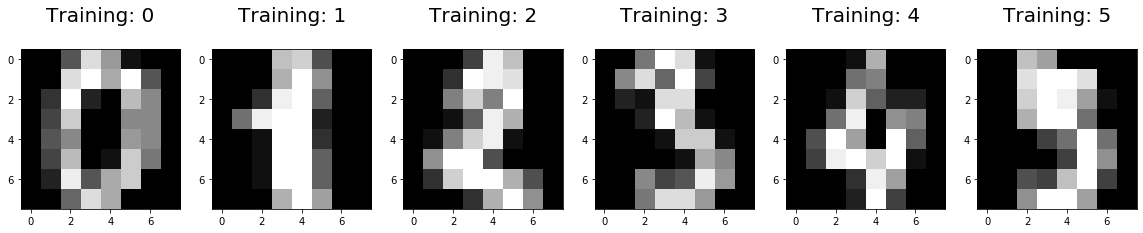

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
 plt.subplot(1, 6, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

# Few topics to explore and suggest possible enhancements. Ingestion and data preparation: What are possible enhancements to the data collection? Use the colors, larger images?, please explore how you could propose the creation of such data set?

* We can improve accuracy by tuning hyperparameters or by using a different algorithm. Also, we can enhance data collection. Enhancing data collection could improve accuracy as well.

* The dataset has 1797 images, which represent an 8*8 image for the dimensionality of 64. We can shift the images by two pixels on either side. If we generate such images and add them to the training dataset and use it to train a model to get better prediction accuracy.

* We can shift images to each of the 4 directions by one pixel. Hence, we can generate 4 images from a single image. The final dataset would now contain 8985 images (1797*5).

* Data extension can be done by using the “data augmentation technique” by shifting the order of the pixel.


In [15]:
# fetch data
X, Y = digits.data, digits.target

In [16]:
# split data into train and test splits
X_train, X_test, Y_train, Y_test = X[:1797], X[1797:], Y[:1797], Y[1797:]

In [17]:
# shift the image by dimension given
def shift_img(img, sx, sy):
    img = img.reshape((8, 8))
    img_shfit = shift(img, [sy, sx], cval=0, mode="constant")
    return img_shfit.reshape([-1])

In [18]:
# creating augmented dataset
from scipy.ndimage.interpolation import shift
augmented_Xtrain = [img for img in X_train]
augmented_Ytrain = [img for img in Y_train]

for sx, sy in ((1,0), (-1,0), (0,1), (0,-1)):
     for img, label in zip(X_train, Y_train):
             augmented_Xtrain.append(shift_img(img, sx, sy))
             augmented_Ytrain.append(label)

In [19]:
# shuffling augmented data
shuffle = np.random.permutation(len(augmented_Xtrain))
augmented_Xtrain = np.array(augmented_Xtrain)[shuffle]
augmented_Ytrain = np.array(augmented_Ytrain)[shuffle]

In [20]:
# size of train dataset after enhancement
augmented_Xtrain.shape

(8985, 64)

In [21]:
#size of test dataset after enhancement
augmented_Ytrain.shape

(8985,)

The size of the dataset has been increased

The answers to rest of the final questions are provided in the attached word document